# For Data exploration

In [1]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt




In [8]:
print(ctx.providers)

{'OpenStreetMap': {'Mapnik': {'url': 'https://tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors', 'attribution': '(C) OpenStreetMap contributors', 'name': 'OpenStreetMap.Mapnik'}, 'DE': {'url': 'https://tile.openstreetmap.de/{z}/{x}/{y}.png', 'max_zoom': 18, 'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors', 'attribution': '(C) OpenStreetMap contributors', 'name': 'OpenStreetMap.DE'}, 'CH': {'url': 'https://tile.osm.ch/switzerland/{z}/{x}/{y}.png', 'max_zoom': 18, 'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors', 'attribution': '(C) OpenStreetMap contributors', 'bounds': [[45, 5], [48, 11]], 'name': 'OpenStreetMap.CH'}, 'France': {'url': 'https://{s}.tile.openstreetmap.fr/osmfr/{z}/{x}/{y}.png', 'max_zoom': 20, 'html_attribution': '&copy; OpenStreetMap 

In [2]:
# Load the shapefiles
gdf_ca_usgs = gpd.read_file('Resources/Shapefiles/CA_fire_usgs.shp')
gdf_dins = gpd.read_file('Resources/Shapefiles/CAL_FIRE_Damage_Inspection_(DINS)_Data.shp')
gdf_perim = gpd.read_file('Resources/Shapefiles/California_Fire_Perimeters_(1950+).shp')

In [3]:
# Show headers and data types for each GeoDataFrame
# Show headers and data types for each GeoDataFrame
print("CA USGS Fire Data:")
print(gdf_ca_usgs.info())
print("\nCAL FIRE Damage Inspection (DINS) Data:")
print(gdf_dins.info())
print("\nCalifornia Fire Perimeters (1950+):")
print(gdf_perim.info())



CA USGS Fire Data:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27323 entries, 0 to 27322
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   USGS_Assig  27323 non-null  int64   
 1   Assigned_F  27323 non-null  object  
 2   Fire_Year   27323 non-null  int64   
 3   Fire_Polyg  27323 non-null  int64   
 4   Fire_Attri  27323 non-null  object  
 5   GIS_Acres   27323 non-null  float64 
 6   GIS_Hectar  27323 non-null  float64 
 7   Source_Dat  27323 non-null  object  
 8   Listed_Fir  27323 non-null  object  
 9   Listed_F_1  27323 non-null  object  
 10  Listed_F_2  27323 non-null  object  
 11  Listed_F_3  26460 non-null  object  
 12  Listed_F_4  927 non-null    object  
 13  Listed_F_5  26989 non-null  object  
 14  Listed_F_6  26637 non-null  object  
 15  Listed_F_7  27323 non-null  object  
 16  Listed_Rx_  3278 non-null   object  
 17  Listed_Map  15046 non-null  object  
 18  Listed_Not  5299 no

In [4]:
print(gdf_ca_usgs.crs)
print(gdf_dins.crs)
print(gdf_perim.crs)


PROJCS["North_America_Albers_Equal_Area_Conic",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",40],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",20],PARAMETER["standard_parallel_2",60],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["ESRI","102008"]]
EPSG:3857
EPSG:3857


In [5]:
gdf_ca_usgs = gdf_ca_usgs.to_crs(epsg=3857)



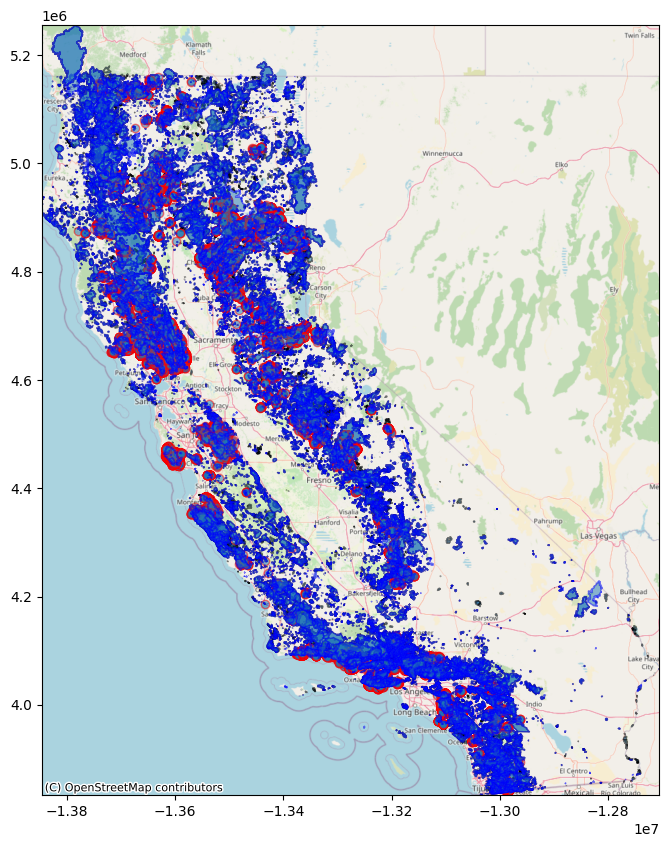

In [9]:


# Set the figure size
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the CA USGS Fire Data
gdf_ca_usgs.plot(ax=ax, alpha=0.5, edgecolor='k')

# Plot the CAL FIRE DINS Data
gdf_dins.plot(ax=ax, alpha=0.5, edgecolor='red')

# Plot the California Fire Perimeters
gdf_perim.plot(ax=ax, alpha=0.5, edgecolor='blue')

# Ensure the extent is set before adding the basemap
ax.set_xlim(gdf_ca_usgs.total_bounds[0], gdf_ca_usgs.total_bounds[2])
ax.set_ylim(gdf_ca_usgs.total_bounds[1], gdf_ca_usgs.total_bounds[3])

# Add a basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=gdf_ca_usgs.crs)

# Show the plot
plt.show()


Save as GeoPackage 

GeoPackage is a more modern and versatile format that stores all layers in a single file. It’s often preferred for more complex datasets:

In [12]:
# Save each GeoDataFrame to its own GeoPackage file
gdf_ca_usgs.to_file("Resources/ca_fire_usgs.gpkg", driver="GPKG")
gdf_dins.to_file("Resources/cal_fire_dins.gpkg", driver="GPKG")
gdf_perim.to_file("Resources/cal_fire_perimeters.gpkg", driver="GPKG")


Load the Saved Files Later 

When you want to load these saved files back into a GeoDataFrame, you can use geopandas.read_file():

In [ ]:
# For GeoPackage
gdf_ca_usgs = gpd.read_file("Resources/ca_fire_usgs.gpkg")
gdf_dins = gpd.read_file("Resources/cal_fire_dins.gpkg")
gdf_perim = gpd.read_file("Resources/cal_fire_perimeters.gpkg")
